# Using Plotly

In [1]:
import pywavefront
import plotly.graph_objects as go

In [6]:
vertices = []
faces = []

# Process each line of the OBJ file
with open('../../Project Data/Aircraft Model/SR71/SR71.obj', 'r') as file:
    for line in file:
        parts = line.split()
        if parts[0] == 'v':  # This is a vertex
            # Convert vertex coordinates to float and add to the list
            vertices.append([float(parts[1]), float(parts[2]), float(parts[3])])
        elif parts[0] == 'f':  # This is a face
            # Convert indices to int and adjust for zero-based indexing (OBJ indices are 1-based)
            faces.append([int(idx.split('/')[0]) - 1 for idx in parts[1:]])

# Now, extract x, y, z coordinates and i, j, k indices for the faces
x, y, z = zip(*vertices)
i, j, k = zip(*[face[:3] for face in faces])  # Assuming all faces are triangles

# Create the Plotly Mesh3d
fig = go.Figure(data=[go.Mesh3d(x=x, 
                                y=y, 
                                z=z, 
                                i=i, 
                                j=j, 
                                k=k,
                                opacity=1,
                                color='red',
                                flatshading=True)])

fig.update_layout(width=1000, 
                  height=800, 
                  template='presentation',
                  scene=dict(aspectmode='manual',
                             aspectratio=dict(x=1, y=1, z=1), 
                             xaxis=dict(showbackground=False, title='X'),
                             yaxis=dict(showbackground=False, title='Y'),
                             zaxis=dict(showbackground=False, title='Z')),
                  scene_camera=dict(eye=dict(x=1.5, 
                                             y=1.5, 
                                             z=1.5)))
fig.show()


# Using Vedo Library

In [3]:
#from vedo import Plotter, load
import vedo
from vedo import show, load, settings

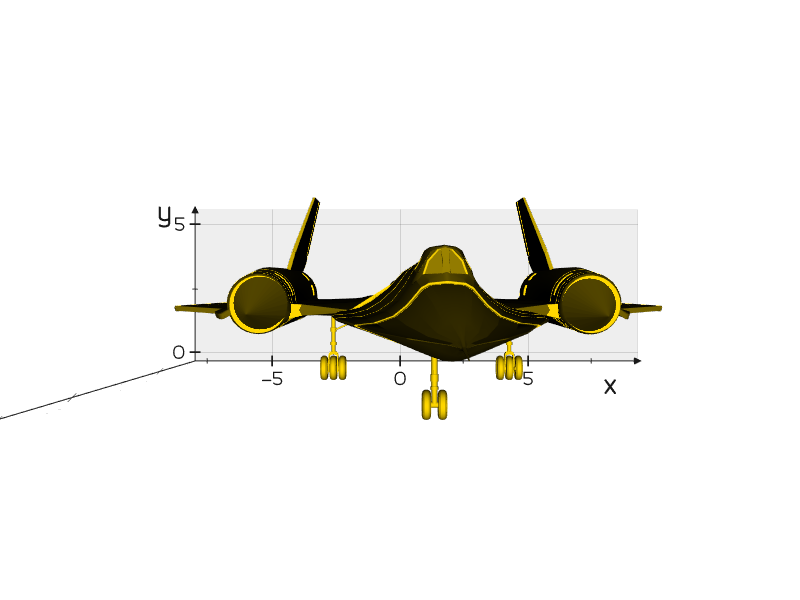

In [4]:
# Load the OBJ file using vedo
mesh = vedo.load('../../Project Data/Aircraft Model/SR71/SR71.obj')

# If running in a Jupyter notebook, this should display the mesh interactively
# The 'interactive' parameter is not needed here since show() will figure it out
vedo.show(mesh, axes=True)

NameError: name 'np' is not defined